
══════════════════════════════════════════════════════════════════════════════════════════
                                FINAL SIMULACIÓN 19/02/24                                 
                               Por: Mateo Toledano Gonzalez                               
══════════════════════════════════════════════════════════════════════════════════════════


▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
█                     RESOLUCIÓN PUNTO A: ALTURA MÁXIMA TEÓRICA (K)                      █
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀

1. Ecuación fundamental para K:
   (K/43.8 - 1)² = (K/21.6 - 1)(K/54.2 - 1)

2. Resolución numérica con valor inicial K₀ = 57.32

3. Verificación:
   Lado izquierdo: 0.09534428
   Lado derecho:   0.09534428
   Diferencia:     5.32e-13

★ Resultado final K = 57.32 cm


▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄

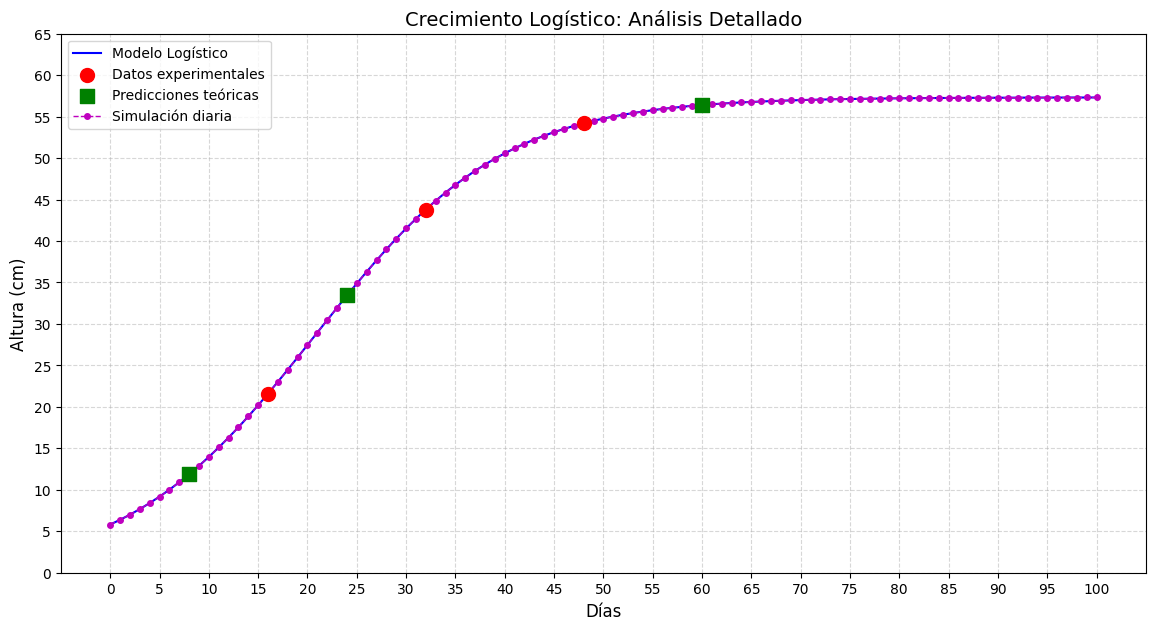

In [1]:
# -*- coding: utf-8 -*-
"""Final Simulación 19/02/24.ipynb

Automatically generated by Colaboratory.
"""

# ======================== CONFIGURACIÓN INICIAL ========================
!pip install tabulate
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from tabulate import tabulate

# ======================== ENCABEZADO PRINCIPAL ========================
print("\n" + "═"*90)
print(" FINAL SIMULACIÓN 19/02/24 ".center(90))
print(" Por: Mateo Toledano Gonzalez ".center(90))
print("═"*90 + "\n")

# ======================== RESOLUCIÓN PUNTO A ========================
print("\n" + "▄"*90)
print("█" + " RESOLUCIÓN PUNTO A: ALTURA MÁXIMA TEÓRICA (K) ".center(88) + "█")
print("▀"*90 + "\n")

def calcular_K():
    # Paso 1: Plantear la ecuación
    print("1. Ecuación fundamental para K:")
    print("   (K/43.8 - 1)² = (K/21.6 - 1)(K/54.2 - 1)\n")

    # Paso 2: Definir función a resolver
    def ecuacion_K(K):
        return (K/43.8 - 1)**2 - (K/21.6 - 1)*(K/54.2 - 1)

    # Paso 3: Resolución numérica
    print("2. Resolución numérica con valor inicial K₀ = 57.32")
    K = fsolve(ecuacion_K, 57.32)[0]

    # Paso 4: Verificación
    print("\n3. Verificación:")
    lado_izq = (K/43.8 - 1)**2
    lado_der = (K/21.6 - 1)*(K/54.2 - 1)
    print(f"   Lado izquierdo: {lado_izq:.8f}")
    print(f"   Lado derecho:   {lado_der:.8f}")
    print(f"   Diferencia:     {abs(lado_izq - lado_der):.2e}\n")

    return K

K = calcular_K()
print(f"★ Resultado final K = \033[1m{K:.2f} cm\033[0m")

# ======================== RESOLUCIÓN PUNTO B ========================
print("\n\n" + "▄"*90)
print("█" + " RESOLUCIÓN PUNTO B: CÁLCULO DE PARÁMETROS Y PREDICCIONES ".center(88) + "█")
print("▀"*90 + "\n")

def calcular_parametros(K):
    print("1. Cálculo de la tasa de crecimiento (r):")
    print("   Usando los puntos (16, 21.6) y (32, 43.8)")
    y1, y2 = 21.6, 43.8
    t1, t2 = 16, 32

    # Paso 1: Calcular ratio
    ratio = ( (K/y1 - 1) / (K/y2 - 1) )
    print(f"\n   Ratio = (K/y₁ - 1)/(K/y₂ - 1) = ({K}/{y1} - 1)/({K}/{y2} - 1)")
    print(f"   = ({K/y1 - 1:.4f})/({K/y2 - 1:.4f}) = {ratio:.4f}")

    # Paso 2: Calcular r
    r = np.log(ratio)/(t2 - t1)
    print(f"\n   r = ln(ratio)/(t₂ - t₁) = ln({ratio:.4f})/{t2 - t1}")
    print(f"   = {np.log(ratio):.6f}/{t2 - t1} = {r:.6f}\n")

    # Paso 3: Calcular c
    print("2. Cálculo de la constante de integración (c):")
    c = np.log(K/y1 - 1) + r*t1
    print(f"\n   c = ln(K/y₁ - 1) + r·t₁ = ln({K/y1 - 1:.4f}) + {r:.6f}×{t1}")
    print(f"   = {np.log(K/y1 - 1):.4f} + {r*t1:.4f} = {c:.4f}\n")

    return r, c

r, c = calcular_parametros(K)

# Predicciones teóricas detalladas
print("\n3. Predicciones teóricas:")
tiempos = [8, 24, 60]
tabla_predicciones = [["Día", "Paso 1: Calcular exponente", "Paso 2: Calcular denominador", "Paso 3: Calcular altura"]]

for t in tiempos:
    # Paso 1: Exponente
    exp = -r*t + c
    # Paso 2: Denominador
    denominador = 1 + np.exp(exp)
    # Paso 3: Altura
    altura = K / denominador

    tabla_predicciones.append([
        t,
        f"-{r:.4f}×{t} + {c:.4f} = {exp:.4f}",
        f"1 + e^{exp:.4f} = {denominador:.4f}",
        f"{K:.2f}/{denominador:.4f} = {altura:.2f} cm"
    ])

print(tabulate(tabla_predicciones, headers="firstrow", tablefmt="grid", stralign="left"))

# ======================== RESOLUCIÓN PUNTO C ========================
print("\n\n" + "▄"*90)
print("█" + " RESOLUCIÓN PUNTO C: SIMULACIÓN INTERACTIVA ".center(88) + "█")
print("▀"*90 + "\n")

def simulacion_interactiva():
    # Configuración inicial
    from IPython.display import display, clear_output
    import time

    # Entrada de usuario
    t_final = int(input("\nIngrese el número de días a simular: "))

    # Generar datos
    dias = np.arange(t_final + 1)
    alturas = K / (1 + np.exp(-r*dias + c))
    diffs = np.diff(alturas, prepend=0)

    # Crear tabla detallada
    tabla_simulacion = [["Día", "Altura (cm)", "Δ Altura", "Fórmula"]]
    for d in dias:
        exponente = -r*d + c
        formula = f"{K:.2f}/(1 + e^{exponente:.4f})"
        tabla_simulacion.append([d, f"{alturas[d]:.2f}", f"{diffs[d]:+.2f}", formula])

    # Mostrar tabla
    print("\n" + "═"*90)
    print(" EVOLUCIÓN DIARIA DETALLADA ".center(90))
    print("═"*90)
    print(tabulate(tabla_simulacion, headers="firstrow", tablefmt="grid", maxheadercolwidths=[None, 12, 12, 50]))

    # Gráfico de alta precisión
    plt.figure(figsize=(14, 7))

    # Curva teórica
    t_continuo = np.linspace(0, max(60, t_final), 1000)
    y_continuo = K / (1 + np.exp(-r*t_continuo + c))
    plt.plot(t_continuo, y_continuo, 'b-', lw=1.5, label='Modelo Logístico')

    # Datos experimentales
    plt.scatter([16,32,48], [21.6,43.8,54.2], color='red', s=100, zorder=5, label='Datos experimentales')

    # Predicciones teóricas
    plt.scatter(tiempos, [K/(1 + np.exp(-r*t + c)) for t in tiempos],
                color='green', s=100, marker='s', zorder=6, label='Predicciones teóricas')

    # Simulación
    plt.plot(dias, alturas, 'm--', marker='o', markersize=4, lw=1, label='Simulación diaria')

    # Personalización
    plt.title('Crecimiento Logístico: Análisis Detallado', fontsize=14)
    plt.xlabel('Días', fontsize=12)
    plt.ylabel('Altura (cm)', fontsize=12)
    plt.grid(linestyle='--', alpha=0.5)
    plt.legend()
    plt.xticks(np.arange(0, max(60, t_final)+1, 5))
    plt.yticks(np.arange(0, K+10, 5))
    plt.show()

simulacion_interactiva()